In [2]:
alphabets = 'abcdefghijklmnopqrstuvqxyz'

In [3]:
int_to_char = dict(enumerate(alphabets))

In [4]:
int_to_char

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'q',
 23: 'x',
 24: 'y',
 25: 'z'}

In [5]:
char_to_int = dict((c,i) for i,c in enumerate(alphabets))
char_to_int

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 22,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'x': 23,
 'y': 24,
 'z': 25}

In [73]:
seq_length = 3
x = []
y = []

for i in range(len(alphabets) - seq_length):
  # seq_in = [alphabets[i]] # in list because multiples characters can be in input
  seq_in =  alphabets[i:i + seq_length]
  seq_out = alphabets[i + seq_length]
  print(seq_in, '--->', seq_out)
  x.append([[char_to_int[char] for char in seq_in]]) # making it two dimenstional bexause the data to model should be two dimentional not one d like in case of linear regression
  y.append(char_to_int[seq_out])

abc ---> d
bcd ---> e
cde ---> f
def ---> g
efg ---> h
fgh ---> i
ghi ---> j
hij ---> k
ijk ---> l
jkl ---> m
klm ---> n
lmn ---> o
mno ---> p
nop ---> q
opq ---> r
pqr ---> s
qrs ---> t
rst ---> u
stu ---> v
tuv ---> q
uvq ---> x
vqx ---> y
qxy ---> z


In [14]:
x

[[[0, 1, 2]],
 [[1, 2, 3]],
 [[2, 3, 4]],
 [[3, 4, 5]],
 [[4, 5, 6]],
 [[5, 6, 7]],
 [[6, 7, 8]],
 [[7, 8, 9]],
 [[8, 9, 10]],
 [[9, 10, 11]],
 [[10, 11, 12]],
 [[11, 12, 13]],
 [[12, 13, 14]],
 [[13, 14, 15]],
 [[14, 15, 22]],
 [[15, 22, 17]],
 [[22, 17, 18]],
 [[17, 18, 19]],
 [[18, 19, 20]],
 [[19, 20, 21]],
 [[20, 21, 22]],
 [[21, 22, 23]],
 [[22, 23, 24]]]

In [15]:
y

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 22,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

### prepare the input data


In [17]:
import numpy as np

In [18]:
x = np.reshape(x, (len(x), 3, 1)) # because the model take 3 d data (samples, time_step/seq_length, dimentions)
x

array([[[ 0],
        [ 1],
        [ 2]],

       [[ 1],
        [ 2],
        [ 3]],

       [[ 2],
        [ 3],
        [ 4]],

       [[ 3],
        [ 4],
        [ 5]],

       [[ 4],
        [ 5],
        [ 6]],

       [[ 5],
        [ 6],
        [ 7]],

       [[ 6],
        [ 7],
        [ 8]],

       [[ 7],
        [ 8],
        [ 9]],

       [[ 8],
        [ 9],
        [10]],

       [[ 9],
        [10],
        [11]],

       [[10],
        [11],
        [12]],

       [[11],
        [12],
        [13]],

       [[12],
        [13],
        [14]],

       [[13],
        [14],
        [15]],

       [[14],
        [15],
        [22]],

       [[15],
        [22],
        [17]],

       [[22],
        [17],
        [18]],

       [[17],
        [18],
        [19]],

       [[18],
        [19],
        [20]],

       [[19],
        [20],
        [21]],

       [[20],
        [21],
        [22]],

       [[21],
        [22],
        [23]],

       [[22],
        [23],
    

In [19]:
x.shape

(23, 3, 1)

In [20]:
# (x - x.min())/(x.max() - x.min()) = x/x.max()
# here x.max() = 25
# because we want out z to printed also that's why we are dividing by 25 not 24

In [21]:
x = x/25

In [22]:
from keras.utils import to_categorical # one hot encoding
y_new = to_categorical(y)

In [23]:
y_new.shape

(23, 26)

In [24]:
y_new

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

### build model

In [25]:
import tensorflow as tf


In [51]:
del(model)

In [69]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (3,1)),
    tf.keras.layers.Dense(25, activation = 'relu'),
    tf.keras.layers.SimpleRNN(32),  # default activation is tanh
    tf.keras.layers.Dense(26, activation = 'softmax')
])

In [53]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1, 25)               │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

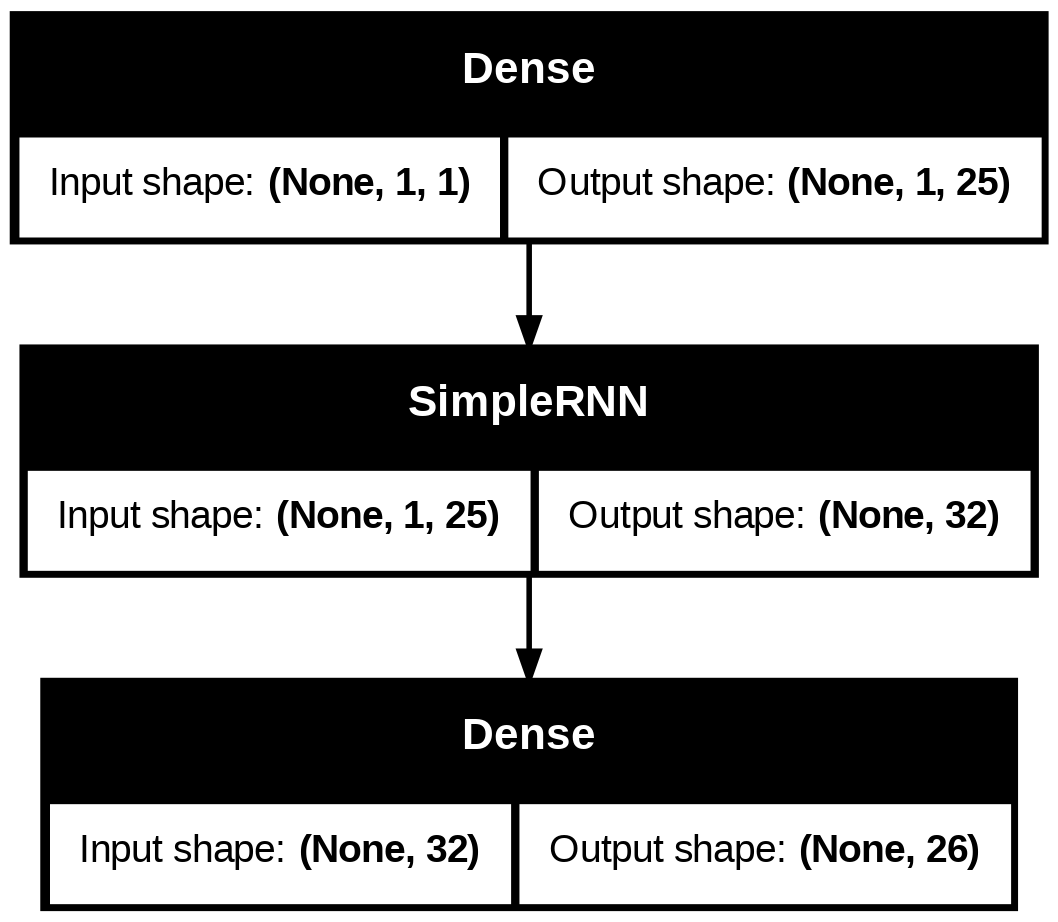

In [54]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

In [55]:
25*32

800

Compile the model

In [59]:
y_new

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

In [56]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

Train the model

In [60]:
history = model.fit(x, y_new, epochs=500, batch_size=1)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6370 - loss: 1.4309 
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4885 - loss: 1.4304     
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - loss: 1.3916 
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7005 - loss: 1.4221 
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 1.4476
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5316 - loss: 1.4696
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 1.3161 
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6965 - loss: 1.4459     
Epoch 9/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4747 - loss: 1.4177     
Epoch 10/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 1.3202 
Epoch 11/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8239 - loss: 1.3769 
Epoch 12/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s

In [61]:
import pandas  as pd

<Axes: >

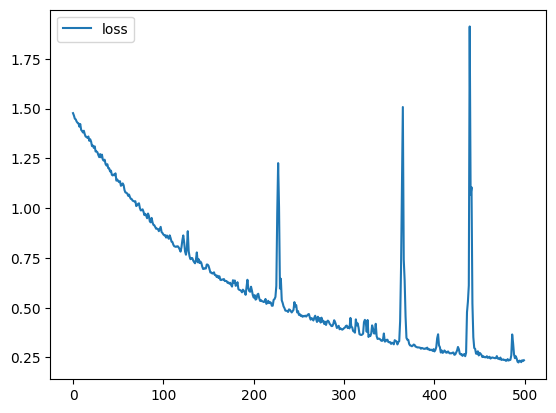

In [62]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(y = ['loss'])

In [68]:
x_new

array([[[0.6 ],
        [0.88],
        [0.68]]])

In [66]:
new = 'pqr'
x_new = np.array([[char_to_int[char] for char in new]])
x_new = x_new/25
x_new = x_new.reshape(1,3,1)
y_hat  = model.predict(x_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [67]:
int_to_char[np.argmax(y_hat)]

's'